In [1]:
##Model Building and saving the model using Pickle


### 1. Import required libraries and read the dataset.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

 

In [2]:
### 2. Check the first few samples, shape, info of the data and try to familiarize
### yourself with different features. 

###  Loading the dataset

df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:

df.shape

(614, 13)

In [4]:
df.info

<bound method DataFrame.info of       loan_id  gender married  dependents     education self_employed  \
0    lp001002    male      no         0.0      graduate            no   
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               58

In [5]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [7]:
###   3. Check for missing values in the dataset, if present? handle them with
###   appropriate methods and drop redundant features. 

df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [8]:
### Replacing missing values in the dataset with mode.
cat_columns_mode = df.select_dtypes('object').columns.tolist()
num_columns_mode = df.select_dtypes('float64','int64').columns.tolist()

for i in cat_columns_mode:
    df[i] = df[[i]].fillna(df[i].mode()[0])
    
for i in num_columns_mode:
    df[i] = df[[i]].fillna(df[i].mode()[0])

In [9]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [10]:
df.isnull().sum()
#df['gender'].unique()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [11]:
### Dropping the columns redundant to the analysis  

df=df.drop(columns=['loan_id'], axis=1)


In [12]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [13]:
### 4. Visualize the distribution of the target column 'loan_status' with respect to
### various categorical features and write your observations. 
 
    ### 8. Visualize the distribution
### of the target column 'heart disease' with respect to various categorical features and write your observations.

categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns


Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

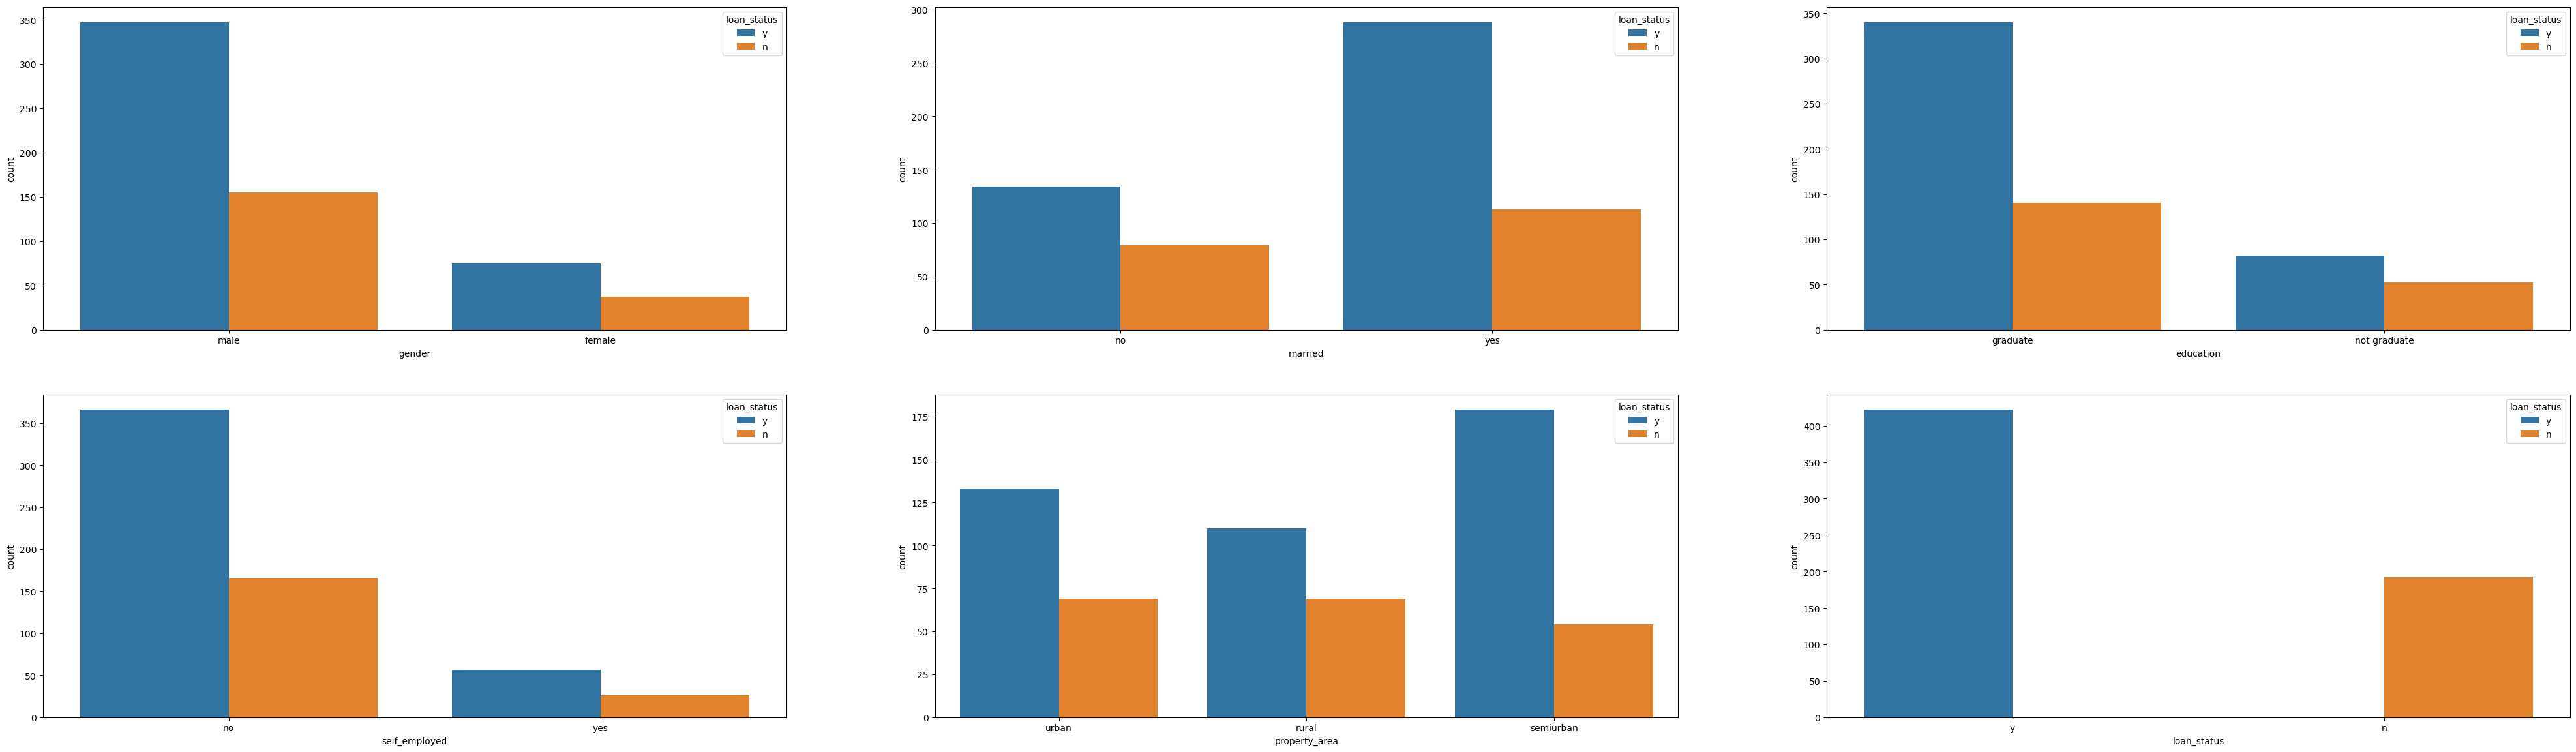

In [14]:
##### Let's look at the distribution loan_status with respect to categorical features

i = 1
plt.figure(figsize = (50,45))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'loan_status' , data = df)
    i +=1

In [15]:
### Inference 
### More number of males have applied for a loan than number of females.
### Loan approval is high for males as compared to females.
### Loan approval is high for salried persons(not self_employed).
### Persons who are  married have higher loan approval as compared to unmarried persons.
### Property in the semi-urban area have a higher chance of loan approval followed by urban and rural areas.
### People who are graduate and above have a higher loan approval as compared to non- graduates.


In [16]:
### 5. Encode the categorical data. 


df['gender'].unique()


array(['male', 'female'], dtype=object)

In [17]:
df['married'].unique()

array(['no', 'yes'], dtype=object)

In [18]:
df['education'].unique()

array(['graduate', 'not graduate'], dtype=object)

In [19]:
df['self_employed'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [21]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [22]:
#### Manual Encoding the data

df['gender']=df['gender'].replace({'male':0, 'female':1})


In [23]:
df['married']=df['married'].replace({'no':0, 'yes':1})


In [24]:
df['education']=df['education'].replace({'graduate':0, 'not graduate':1})


In [25]:
df['self_employed']=df['self_employed'].replace({'no':0, 'yes':1})



In [26]:
df['property_area']=df['property_area'].replace({'urban':0, 'rural':1, 'semiurban':2})

In [27]:
df['loan_status']=df['loan_status'].replace({'y':1 ,'n':0})

In [28]:
### 6. Separate the target and independent features and split the data into train and test

## Lets store the target column in the Y variable and the rest of the columns in the X variable.

X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [29]:

###Spliting the dataset into two parts (i.e. 70% train and 30% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [30]:
### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 

rfc1 = RandomForestRegressor()

rfc1.fit(X_train.values, y_train)

RandomForestRegressor()

In [31]:
 ### Check the r2-scores for train and test

y_train_pred = rfc1.predict(X_train)
y_test_pred = rfc1.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train : ', r2_train)
print('r2-score test : ', r2_test)


r2-score train :  0.8979254577028033
r2-score test :  0.15832139794168087


In [32]:
 ### 11. Create a pickle file with an extension as .pkl
    
 import pickle

# Saving model to disk

pickle.dump(rfc1, open('model.pkl' ,'wb'))